In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
sample_submission = pd.read_csv("data/sample_submission.csv")
test_df = pd.read_csv("data/test.csv")
train_df = pd.read_csv("data/train.csv")

In [5]:
sample_submission

,id,FloodProbability
0,1117957,0.5
1,1117958,0.5
2,1117959,0.5
3,1117960,0.5
4,1117961,0.5
...,...,...
745300,1863257,0.5
745301,1863258,0.5
745302,1863259,0.5
745303,1863260,0.5


In [6]:
test_df

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors
0,1117957,4,6,3,5,6,7,8,7,8,...,8,5,7,5,6,3,6,4,4,5
1,1117958,4,4,2,9,5,5,4,7,5,...,2,4,7,4,5,1,7,4,4,3
2,1117959,1,3,6,5,7,2,4,6,4,...,7,9,2,5,5,2,3,6,8,3
3,1117960,2,4,4,6,4,5,4,3,4,...,7,8,4,6,7,6,4,2,4,4
4,1117961,6,3,2,4,6,4,5,5,3,...,4,3,2,6,4,6,8,4,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745300,1863257,5,4,8,3,5,4,4,5,5,...,5,6,1,3,5,6,4,4,6,6
745301,1863258,4,4,2,12,4,3,4,3,5,...,3,7,4,4,3,5,5,3,5,4
745302,1863259,5,7,9,5,5,6,7,5,5,...,6,11,3,11,4,5,9,5,5,4
745303,1863260,4,7,6,3,5,2,3,8,6,...,6,6,8,6,2,3,8,7,5,5


In [7]:
train_df

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,0,5,8,5,8,6,4,4,3,3,...,5,3,3,5,4,7,5,7,3,0.445
1,1,6,7,4,4,8,8,3,5,4,...,7,2,0,3,5,3,3,4,3,0.450
2,2,6,5,6,7,3,7,1,5,4,...,7,3,7,5,6,8,2,3,3,0.530
3,3,3,4,6,5,4,8,4,7,6,...,2,4,7,4,4,6,5,7,5,0.535
4,4,5,3,2,6,4,4,3,3,3,...,2,2,6,6,4,1,2,3,5,0.415
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1117952,1117952,3,3,4,10,4,5,5,7,10,...,7,8,7,2,2,1,4,6,4,0.495
1117953,1117953,2,2,4,3,9,5,8,1,3,...,9,4,4,3,7,4,9,4,5,0.480
1117954,1117954,7,3,9,4,6,5,9,1,3,...,5,5,5,5,6,5,5,2,4,0.485
1117955,1117955,7,3,3,7,5,2,3,4,6,...,6,8,5,3,4,6,7,6,4,0.495


In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1117957 entries, 0 to 1117956
Data columns (total 22 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   id                               1117957 non-null  int64  
 1   MonsoonIntensity                 1117957 non-null  int64  
 2   TopographyDrainage               1117957 non-null  int64  
 3   RiverManagement                  1117957 non-null  int64  
 4   Deforestation                    1117957 non-null  int64  
 5   Urbanization                     1117957 non-null  int64  
 6   ClimateChange                    1117957 non-null  int64  
 7   DamsQuality                      1117957 non-null  int64  
 8   Siltation                        1117957 non-null  int64  
 9   AgriculturalPractices            1117957 non-null  int64  
 10  Encroachments                    1117957 non-null  int64  
 11  IneffectiveDisasterPreparedness  1117957 non-null 

# O significado de cada atributo do seu conjunto de dados:

id: Um identificador único para cada entrada no conjunto de dados.

MonsoonIntensity (IntensidadeMonções): Mede a intensidade das monções, que são chuvas sazonais fortes. Uma maior intensidade pode aumentar o risco de inundações.

TopographyDrainage (DrenagemTopográfica): Avalia como a topografia de uma área facilita ou dificulta a drenagem da água. Áreas com má drenagem topográfica são mais propensas a inundações.

RiverManagement (GestãoFluvial): Refere-se às práticas de gerenciamento de rios, como a construção de diques e barragens para controlar o fluxo de água e prevenir inundações.

Deforestation (Desmatamento): Refere-se ao desmatamento de florestas. A remoção de vegetação pode aumentar a escorrência superficial e o risco de inundações.

Urbanization (Urbanização): Refere-se ao desenvolvimento de áreas urbanas. A urbanização pode reduzir a permeabilidade do solo, aumentando a escorrência e o risco de inundações.

ClimateChange (MudançaClimática): Mede os efeitos das mudanças climáticas, que podem incluir o aumento da frequência e intensidade de eventos climáticos extremos, como tempestades e inundações.

DamsQuality (QualidadeBarragens): Avalia a condição e a integridade das barragens. Barragens de má qualidade podem falhar e causar inundações.

Siltation (Assoreamento): Refere-se ao acúmulo de sedimentos em corpos d'água, que pode reduzir a capacidade de armazenamento de água e aumentar o risco de inundações.

AgriculturalPractices (PráticasAgrícolas): Refere-se às práticas agrícolas que podem afetar a escorrência da água e a erosão do solo. Práticas inadequadas podem aumentar o risco de inundações.

Encroachments (Invasões): Refere-se à ocupação de áreas ribeirinhas ou zonas de proteção ambiental. Essas invasões podem obstruir vias naturais de drenagem e aumentar o risco de inundações.

IneffectiveDisasterPreparedness (PreparaçãoDesastresIneficaz): Avalia a eficácia dos planos e medidas de preparação para desastres. Preparações inadequadas podem agravar os impactos das inundações.

DrainageSystems (SistemasDrenagem): Refere-se à infraestrutura de drenagem existente em uma área. Sistemas de drenagem inadequados ou insuficientes podem aumentar o risco de inundações.

CoastalVulnerability (VulnerabilidadeCosteira): Mede a suscetibilidade de áreas costeiras a eventos como tempestades e aumento do nível do mar, que podem causar inundações.

Landslides (Deslizamentos): Refere-se à ocorrência de deslizamentos de terra, que podem ser desencadeados por chuvas intensas e podem bloquear cursos de água, levando a inundações.

Watersheds (BaciasHidrográficas): Refere-se à condição das bacias hidrográficas. Bacias hidrográficas saudáveis ajudam a regular o fluxo de água e reduzir o risco de inundações.

DeterioratingInfrastructure (InfraestruturaDeteriorada): Avalia o estado da infraestrutura, como estradas e pontes. Infraestruturas deterioradas podem falhar durante eventos climáticos extremos, contribuindo para inundações.

PopulationScore (PontuaçãoPopulacional): Refere-se à densidade populacional ou ao número de pessoas em uma área. Áreas densamente povoadas podem ter maior risco de danos e perdas humanas em caso de inundações.

WetlandLoss (PerdaPântanos): Refere-se à perda de áreas úmidas, que atuam como esponjas naturais, absorvendo o excesso de água e reduzindo o risco de inundações.

InadequatePlanning (PlanejamentoInadequado): Avalia a qualidade do planejamento urbano e ambiental. Planejamento inadequado pode aumentar a vulnerabilidade a inundações.

PoliticalFactors (FatoresPolíticos): Refere-se a influências políticas que podem afetar a gestão de riscos de inundação, como políticas públicas, corrupção ou falta de vontade política.

FloodProbability (ProbabilidadeInundação): Uma medida contínua (float) que indica a probabilidade de ocorrência de inundações em uma determinada área, com base nos fatores acima e possivelmente outros dados.

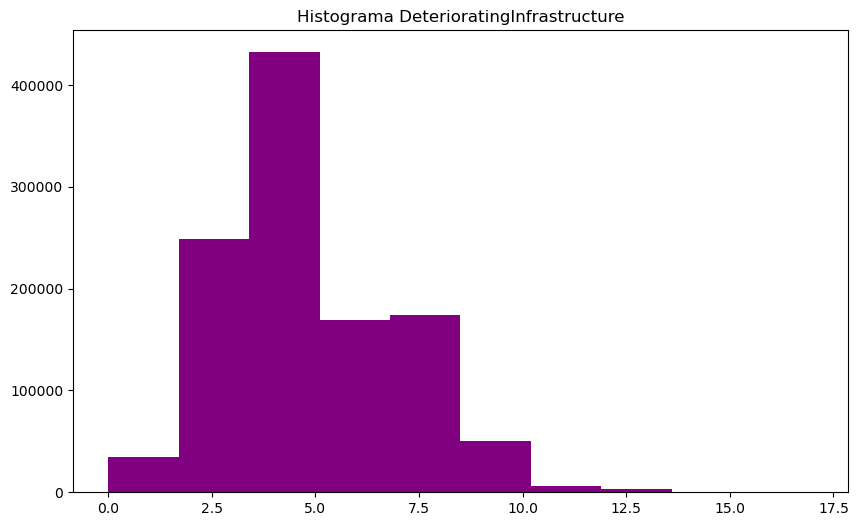

In [27]:
plt.figure(figsize=(10, 6))
plt.hist(train_df['DeterioratingInfrastructure'], color='purple')
plt.title("Histograma DeterioratingInfrastructure")
plt.show()

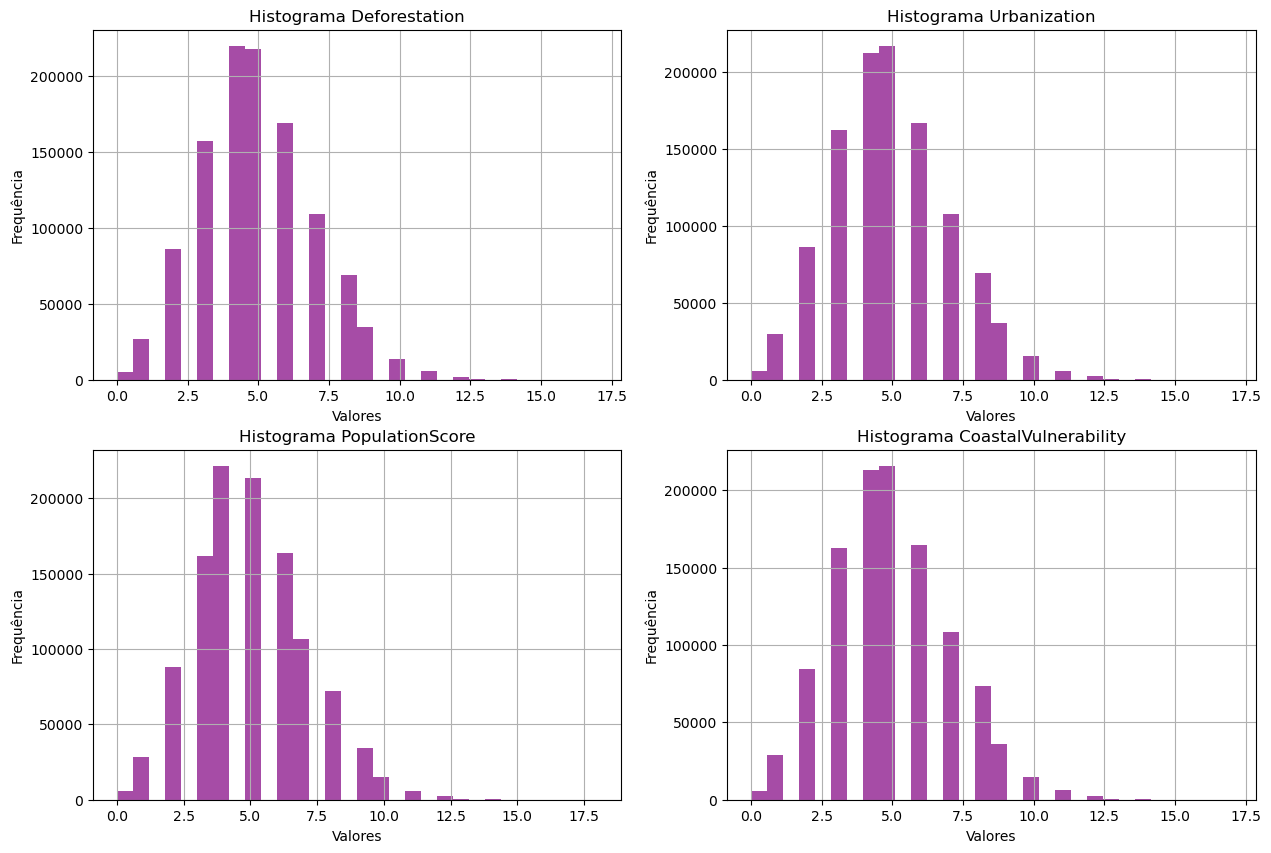

In [29]:
colunas = ['Deforestation', 'Urbanization', 'PopulationScore', 'CoastalVulnerability']

fig, axs = plt.subplots(2, 2, figsize=(15, 10))

for i, col in enumerate(colunas):
    row = i // 2
    col = i % 2
    axs[row, col].hist(train_df[colunas[i]], bins=30, color='purple', alpha=0.7)
    axs[row, col].set_title(f'Histograma {colunas[i]}')
    axs[row, col].set_xlabel('Valores')
    axs[row, col].set_ylabel('Frequência')
    axs[row, col].grid(True)

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor

In [39]:
X = train_df.drop(columns=['FloodProbability'])
y = train_df['FloodProbability']

X.shape, y.shape

((1117957, 21), (1117957,))

In [40]:
regressor_model = LinearRegression()
regressor_model.fit(X, y)

LinearRegression()

In [41]:
regressor_model.intercept_

-0.05331995710109949

In [42]:
regressor_model.coef_

array([3.72340691e-11, 5.61158655e-03, 5.64756604e-03, 5.66643395e-03,
       5.67914809e-03, 5.65771902e-03, 5.66253271e-03, 5.65494179e-03,
       5.63783205e-03, 5.63522206e-03, 5.64989379e-03, 5.64040011e-03,
       5.63555688e-03, 5.67089123e-03, 5.64162158e-03, 5.64650243e-03,
       5.61563220e-03, 5.67749747e-03, 5.63493529e-03, 5.60869392e-03,
       5.64939858e-03])

In [44]:

len(regressor_model.coef_)


21

In [45]:
regressor_model.score(X, y)

0.8449501605368549

In [57]:
predictions = regressor_model.predict(test_df)

predictions

array([0.57363594, 0.45526411, 0.45476316, ..., 0.62437872, 0.550974  ,
       0.51152058])

In [62]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(regressor_model, X, y, cv=5, scoring='neg_mean_squared_error')
print("Cross-validated scores (neg_mean_squared_error):", scores)
print("Average MSE:", -scores.mean())

Cross-validated scores (neg_mean_squared_error): [-0.00040257 -0.00040357 -0.00040563 -0.00040196 -0.00040487]
Average MSE: 0.000403718294082019


In [ ]:
from sklearn.utils import resample

# Função para calcular a média de MSE usando bootstrap
def bootstrap_evaluation(regressor_model, X, y, n_iterations=1000):
    scores = []
    for _ in range(n_iterations):
        X_resampled, y_resampled = resample(X, y, replace=True, n_samples=len(X))
        regressor_model.fit(X_resampled, y_resampled)
        predictions = regressor_model.predict(X)
        score = mean_squared_error(y, predictions)
        scores.append(score)
    return np.array(scores)

# Avaliar usando bootstrap
bootstrap_scores = bootstrap_evaluation(regressor_model, X, y)
print(f"Bootstrap Mean Squared Error (MSE): {bootstrap_scores.mean()}")
